Import Statements

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
from google.colab.patches import cv2_imshow
from PIL import Image
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.feature import greycomatrix
from skimage.filters import sobel
from sklearn.cluster import KMeans
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import skimage
from sklearn.neighbors import KNeighborsClassifier
import skimage.feature as feature
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

Bank Note Image Preprocessing and Enhancement

In [10]:
preProcessedPNG=[] #List will store preProcessed File Names and the resepective PNGs
preProcessedJPG=[] #List will store preProcessed File Names and the resepective JPGs

#Change Path In The Below Two For Loops
for filename in glob.glob(r'/content/drive/MyDrive/702Proj/RandNotes/*.png'):
    #print(filename)
    image = cv2.imread(filename)
    #cv2_imshow(image)
    resized_image = cv2.resize(image, (380, 199))
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    gaussian_blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    histogram_equalized_image = cv2.equalizeHist(gaussian_blurred_image)
    #cv2_imshow(histogram_equalized_image)
    preProcessedPNG.append([filename,histogram_equalized_image])
   
for filename in glob.glob(r'/content/drive/MyDrive/702Proj/RandNotes/*.jpg'):
    #print(filename)
    image = cv2.imread(filename)
    #cv2_imshow(image)
    resized_image = cv2.resize(image, (380, 199))
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    gaussian_blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    histogram_equalized_image = cv2.equalizeHist(gaussian_blurred_image)
    #cv2_imshow(histogram_equalized_image)
    preProcessedJPG.append([filename,histogram_equalized_image])
   

Bank Note Segmentation



3 different types of segementation techniques were compared
Edge Dectection(sobel filters,Laplacian Gausian), Thresholding(Global,Adaptative) and Region-Based Segmentation
From the different typesa of techniques Region-Based segmentation performed the best,therefore will be using this technique *italicized text*


#Edge Segmentation
def EdgeSementation(fn,img,typeP):
  #image=Image.open(img)
  #image-cv2.imread(img)
  #image=img.resize((320,225))
  #image=np.array(img)
  image=img
  #Display the gray level of the image
  #gray = rgb2gray(image)  
  #plt.imshow(image)
   
  # defining the sobel filters
  sobelHorizontal = np.array([np.array([-1, -2, -1]), np.array([0, 0, 0]), np.array([1, 2, 1])])
  sobelVertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])

  horizontal = ndimage.convolve(image, sobelHorizontal, mode='reflect')
  vertical = ndimage.convolve(image, sobelVertical, mode='reflect')

  #Determines how the input array is extended when the filter overlaps a border.
  plt.imshow(horizontal, cmap='gray')
  plt.imshow(vertical, cmap='gray')
  plt.title('Sobel filter')
  plt.show()

  #Laplacian of Gausian 
  kernel_laplace = np.array([np.array([-1, -1, -1]), np.array([-1, 8, -1]), np.array([-1, -1, -1])])
  laplacian = ndimage.convolve(image, kernel_laplace, mode='reflect')
  plt.imshow(laplacian, cmap='gray')
  plt.title('Laplacian Gausian')
  plt.show()
  if typeP == '1':
     cv2.imwrite(f'BankNotes\\Output\\edgeSegmentation\\{os.path.basename(fn)}.resized.png', laplacian)
  else:
    cv2.imwrite(f'BankNotes\\Output\\edgeSegmentation\\{os.path.basename(fn)}.resized.jpg', laplacian)



#Global THresholding
def GlobalThresholding(fn,img,typeP):
  #image=Image.open(img) 
  #image=image.resize((320,225))
  #image=np.array(image)
  #Display the gray level of the image
  #gray = rgb2gray(image)  
  #plt.imshow(image)
  #image.shape
  #plt.imshow(image)
  #gray = rgb2gray(image)
  gray=img
  #plt.imshow(gray, cmap='gray')
  gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
  for i in range(gray_r.shape[0]):
      if gray_r[i] > gray_r.mean():
          gray_r[i] = 1
      else:
          gray_r[i] = 0
  gray = gray_r.reshape(gray.shape[0],gray.shape[1])
  plt.imshow(gray, cmap='gray')
  plt.title('Global THresholding')
  plt.xticks([]),plt.yticks([])
  plt.show()
  if typeP == '1':
     cv2.imwrite(f'BankNotes\\Output\\GlobalThresholding\\{os.path.basename(fn)}.resized.png', gray)
  else:
    cv2.imwrite(f'BankNotes\\Output\\GlobalThresholding\\{os.path.basename(fn)}.resized.jpg', gray)



#Adaptive Thresholding
def adaptiveThreshold(fn,img,typeP):
  #img = cv2.imread(img1,0)
  #img = cv2.medianBlur(img,5)
  th1 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
  th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
  titles = ['Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
  images = [ th1, th2]
  #Adaptive Mean Thresholding
  plt.imshow(images[0],'gray')
  plt.title(titles[0])
  plt.xticks([]),plt.yticks([])
  plt.show()
  #Adaptive Gausian Thresholding
  plt.imshow(images[1],'gray')
  plt.title(titles[1])
  plt.xticks([]),plt.yticks([])
  plt.show()
  if typeP == '1':
     cv2.imwrite(f'BankNotes\\Output\\adaptiveThresholding\\{os.path.basename(fn)}.resized.png', images[0])
     cv2.imwrite(f'BankNotes\\Output\\adaptiveThresholding\\{os.path.basename(fn)}.resized.png', images[1])
  else:
    cv2.imwrite(f'BankNotes\\Output\\adaptiveThresholding\\{os.path.basename(fn)}.resized.jpg', images[0])
    cv2.imwrite(f'BankNotes\\Output\\adaptiveThresholding\\{os.path.basename(fn)}.resized.png', images[1])


In [ ]:
rbsJPG=[] #List will store the File Names and the resepective PNGs that have been region based segmented
rbsPNG=[] #List will store the File Names and the resepective JPGGs that have been region based segmented

In [ ]:
#Region Based Segmentation
def RegionBased(filename,img,typeP):
  elevation_map = sobel(img)
  figure, axis = plt.subplots(figsize=(18,8))
  axis.imshow(elevation_map, cmap='gray', interpolation='nearest')
  axis.axis('off')
  axis.set_title('elevation_map')
  if typeP == '1':
    rbsPNG.append([filename,img])
  else:
     rbsJPG.append([filename,img])

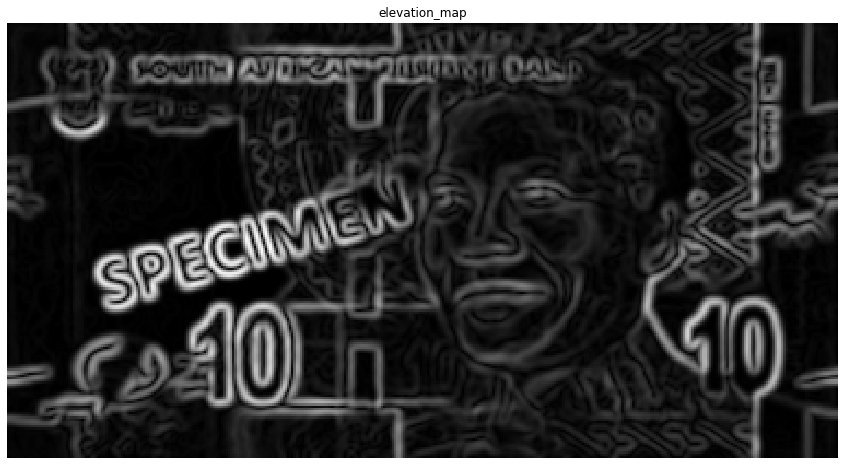

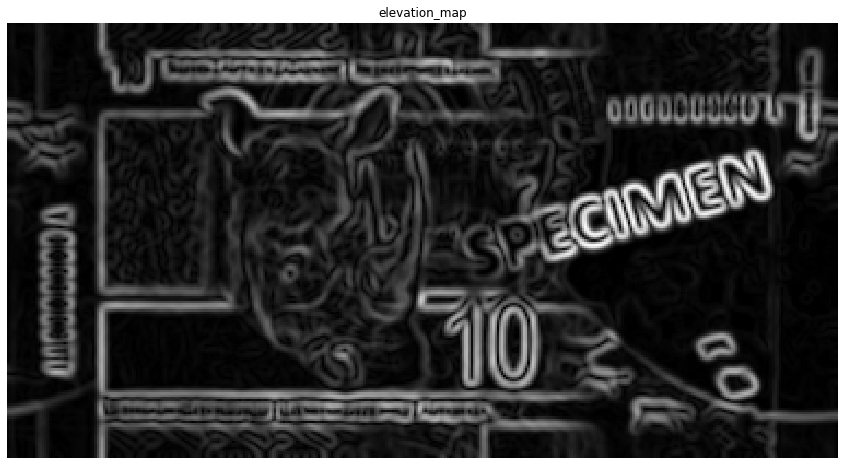

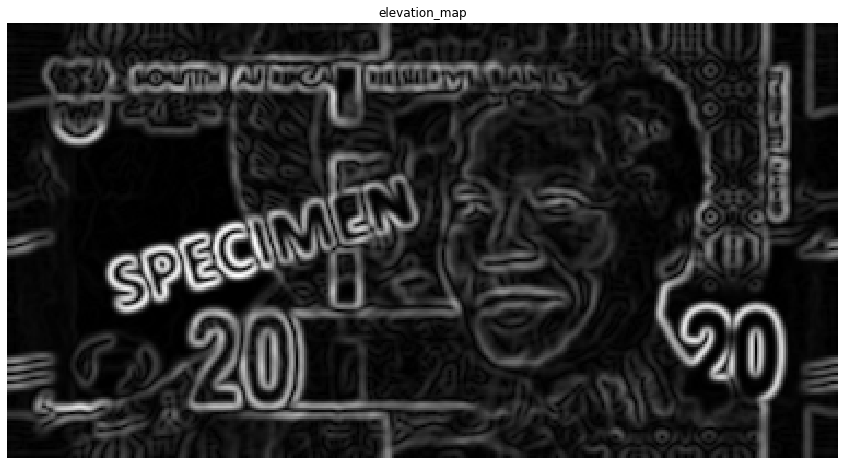

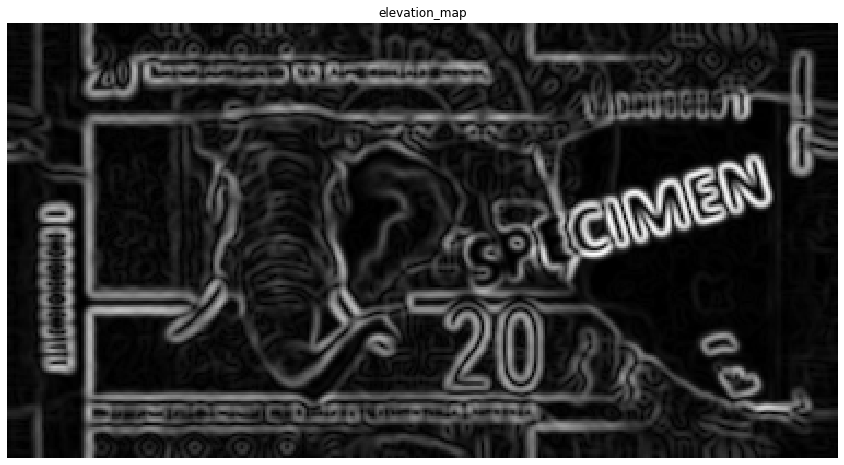

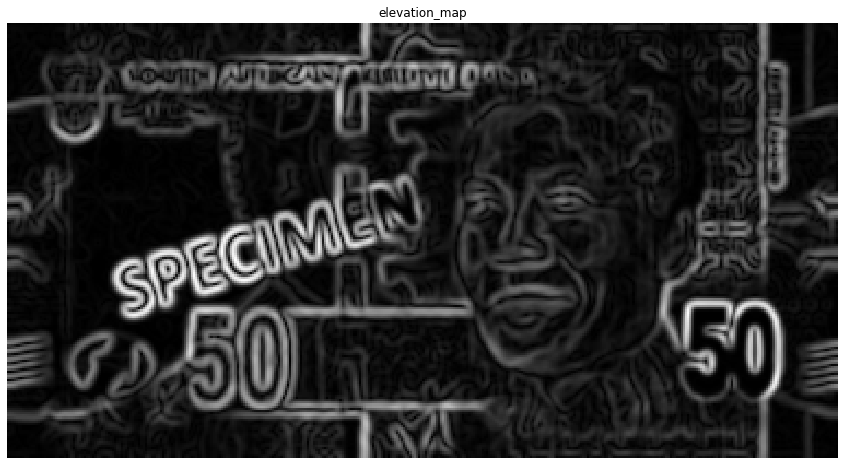

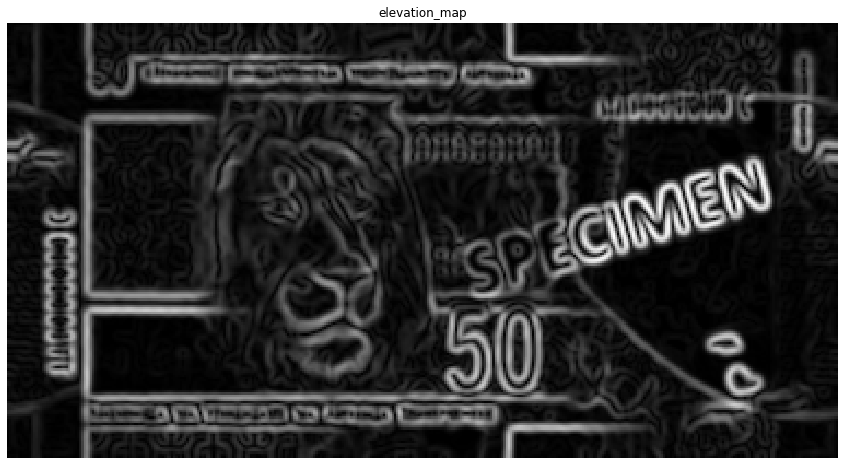

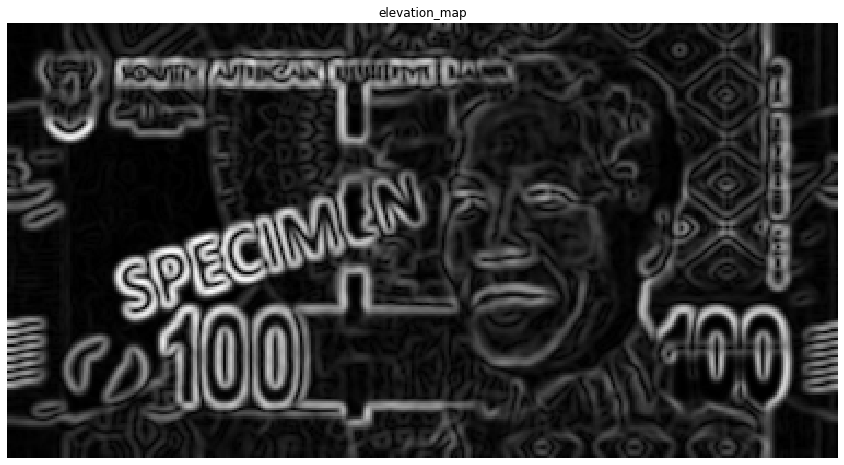

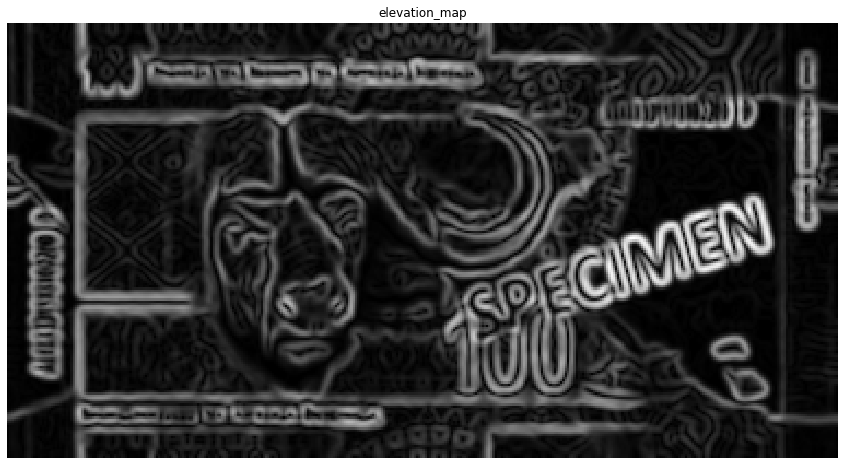

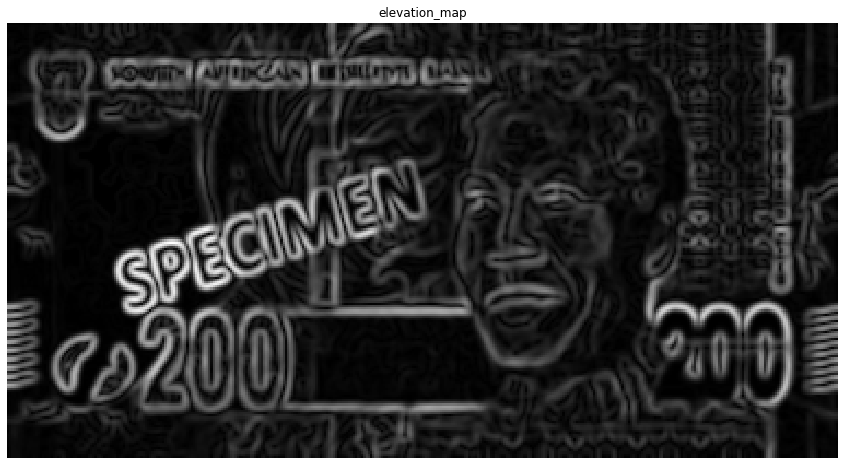

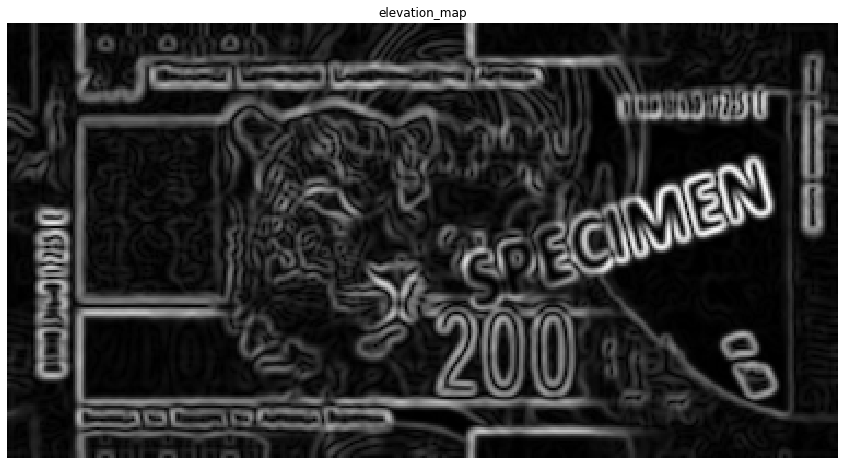

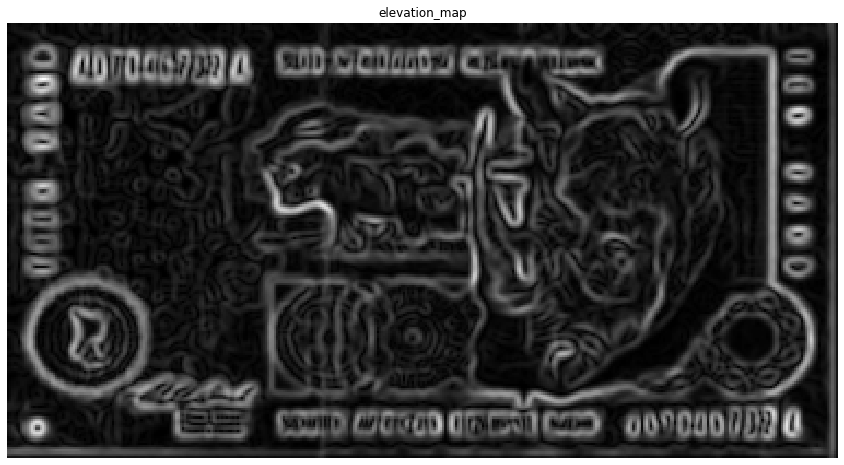

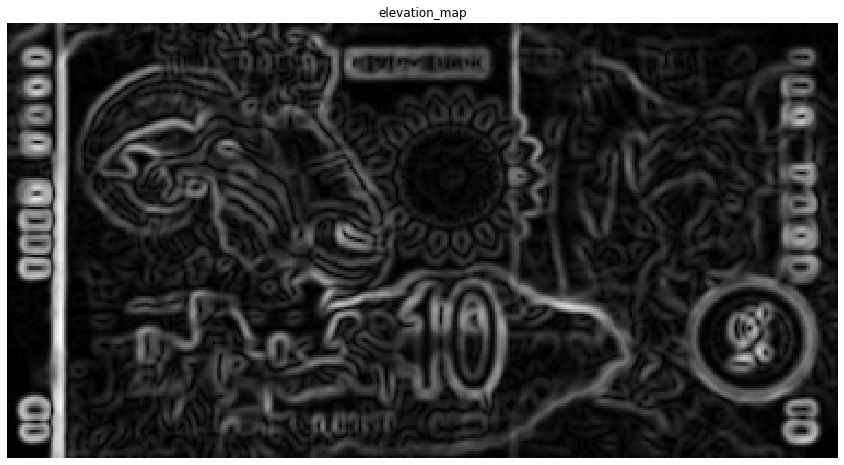

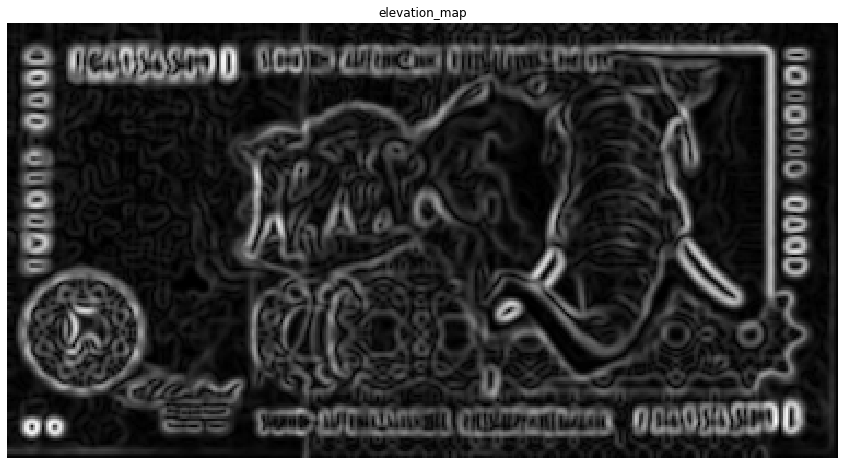

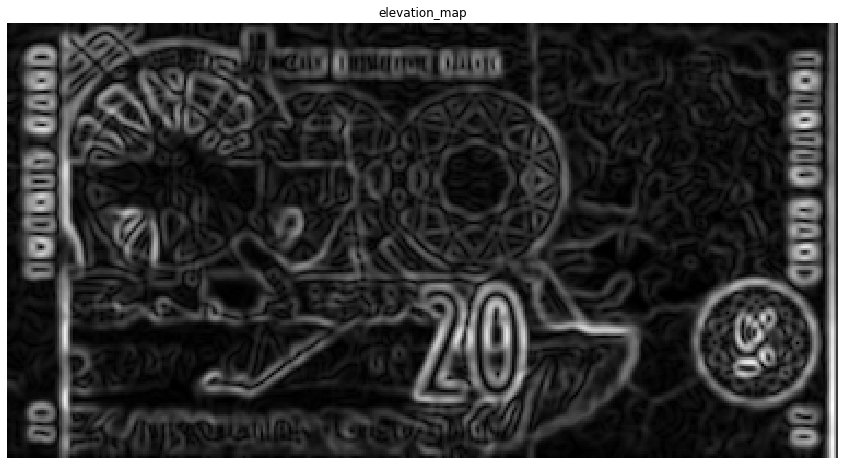

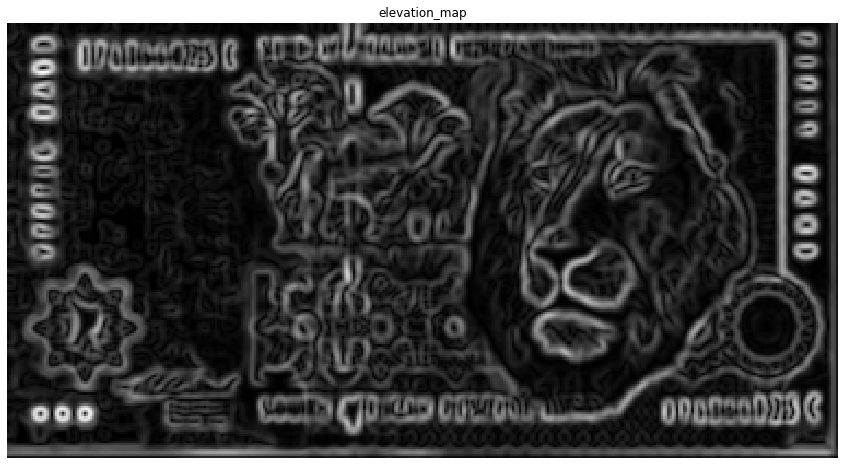

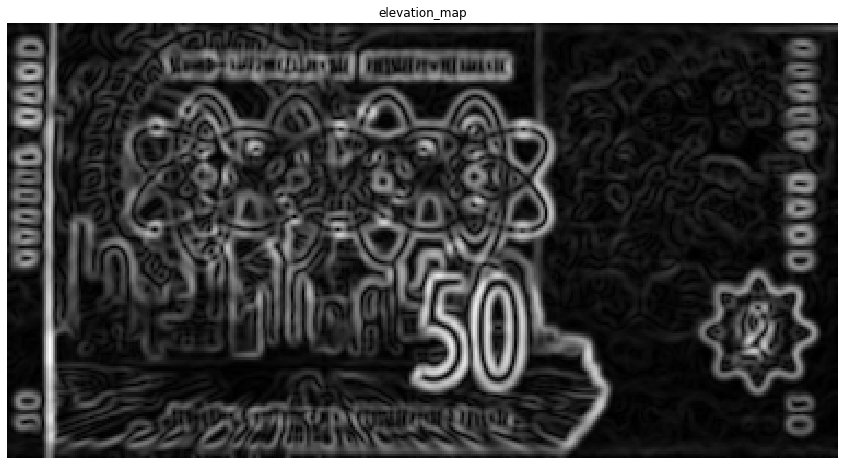

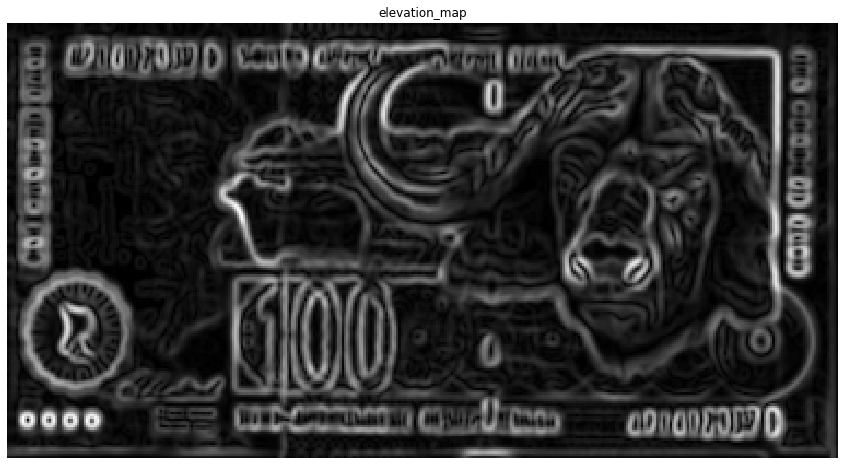

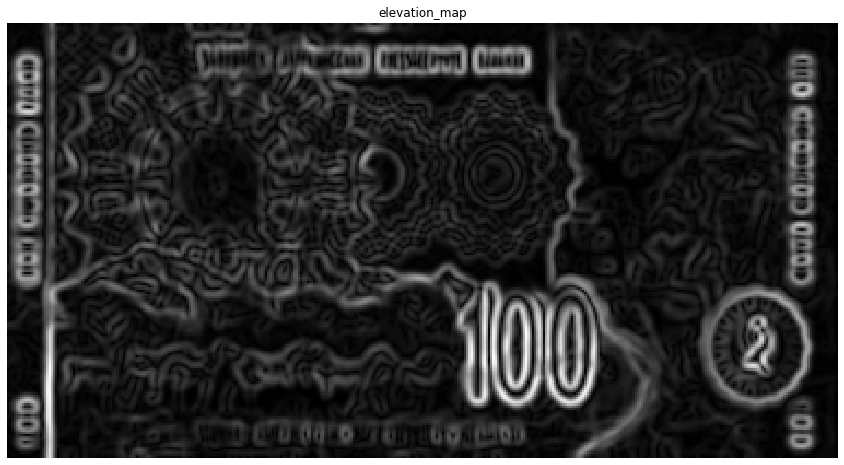

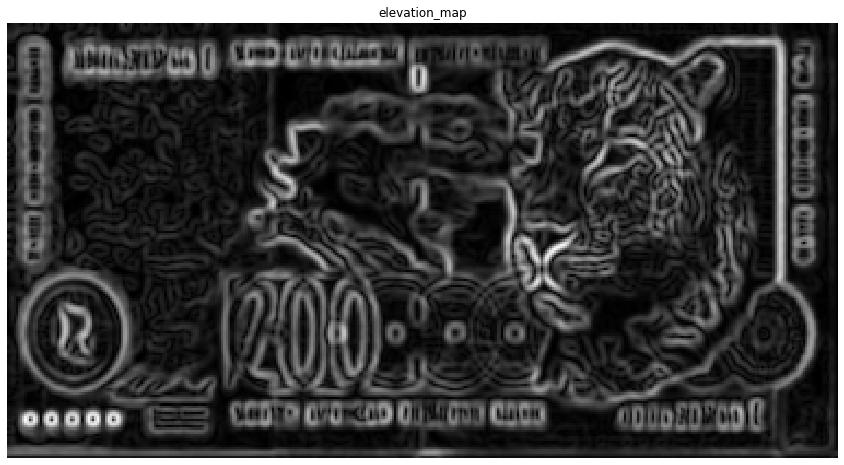

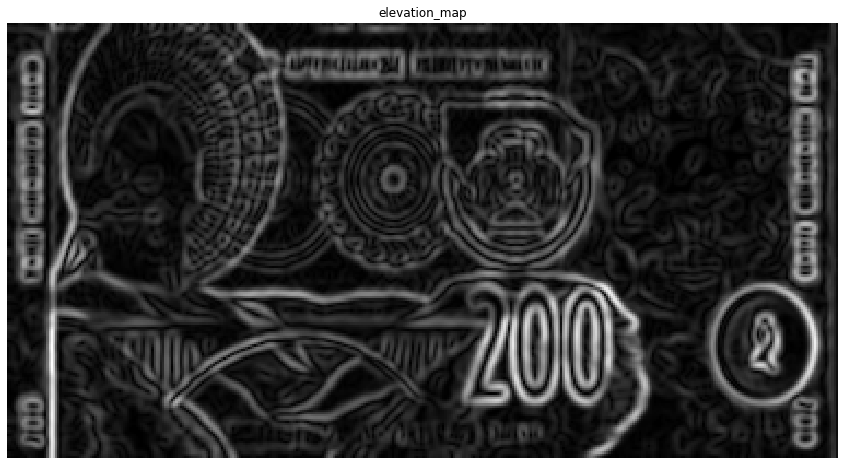

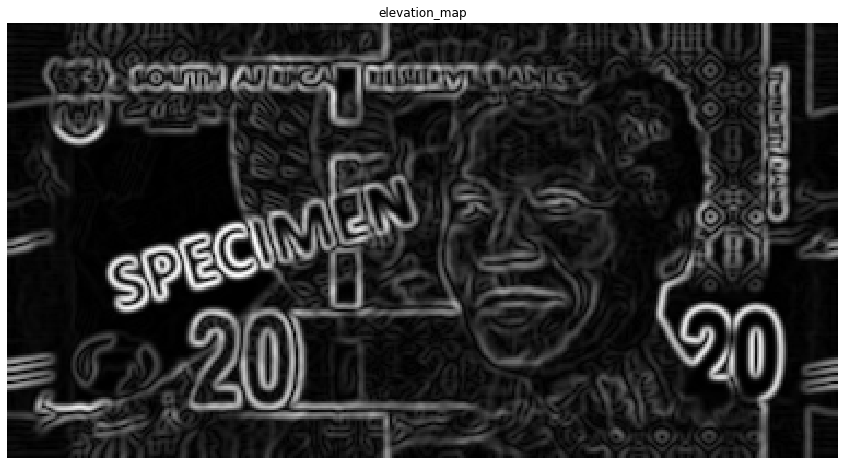

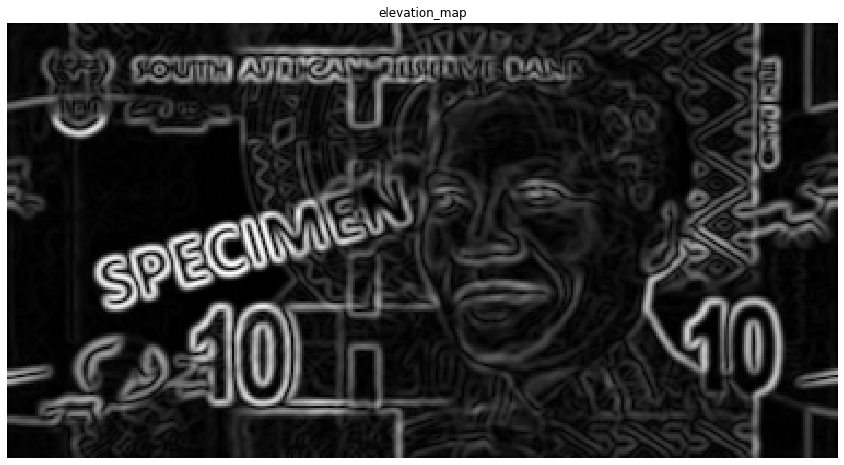

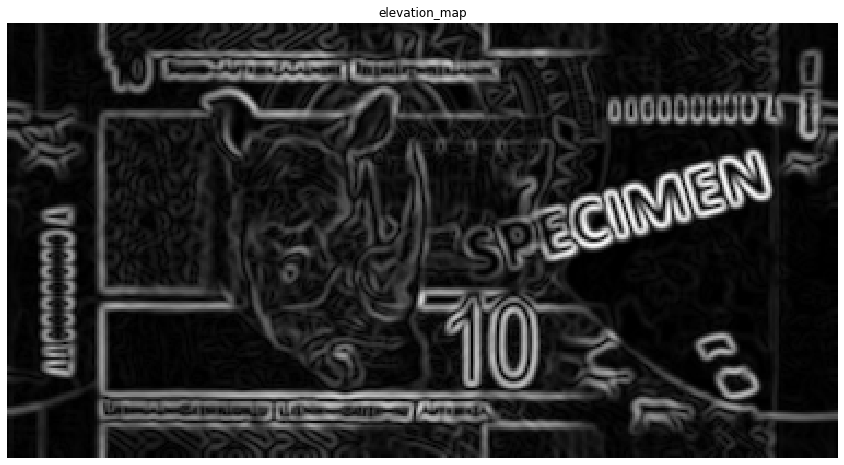

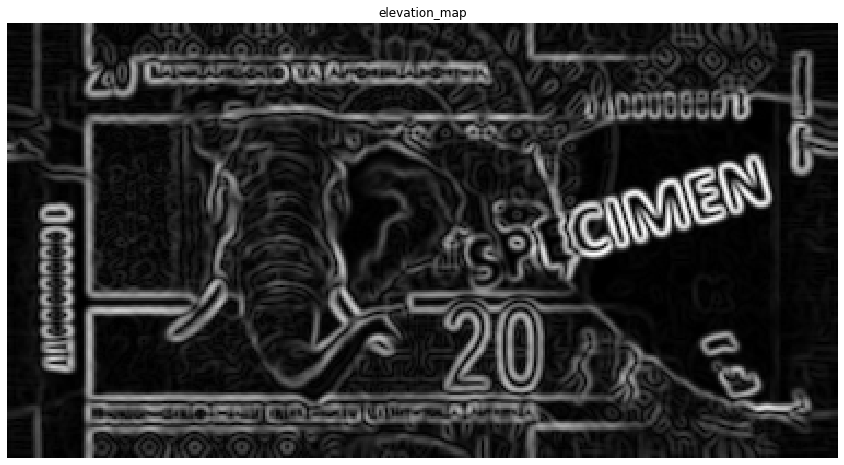

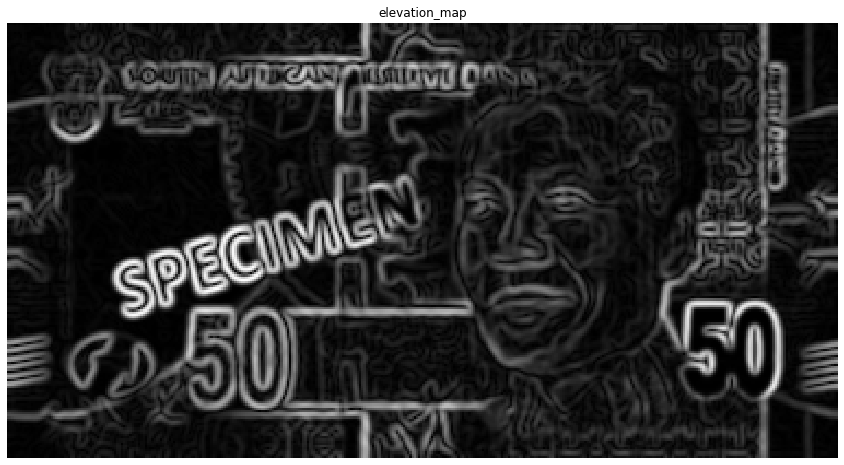

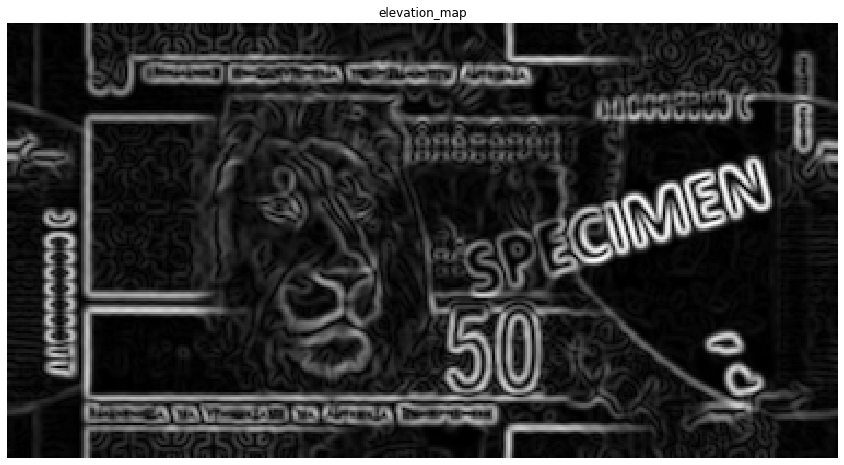

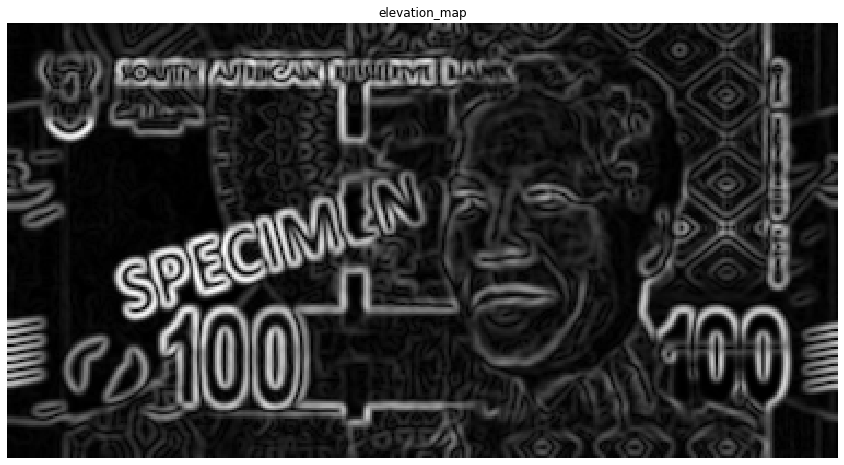

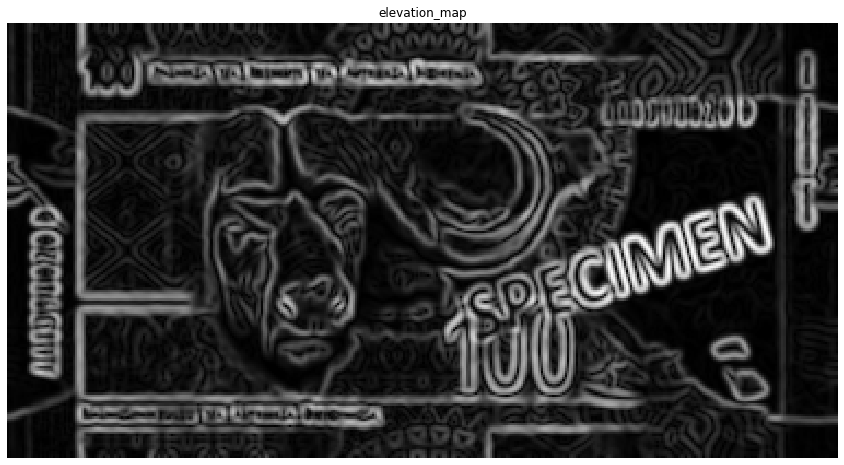

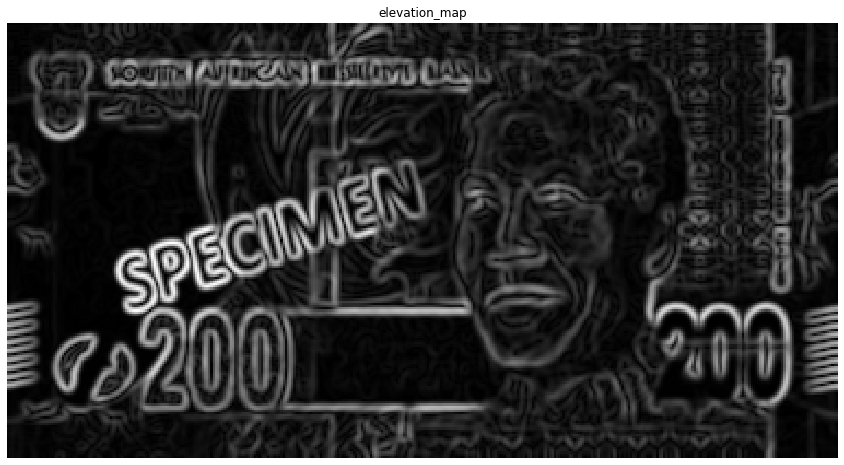

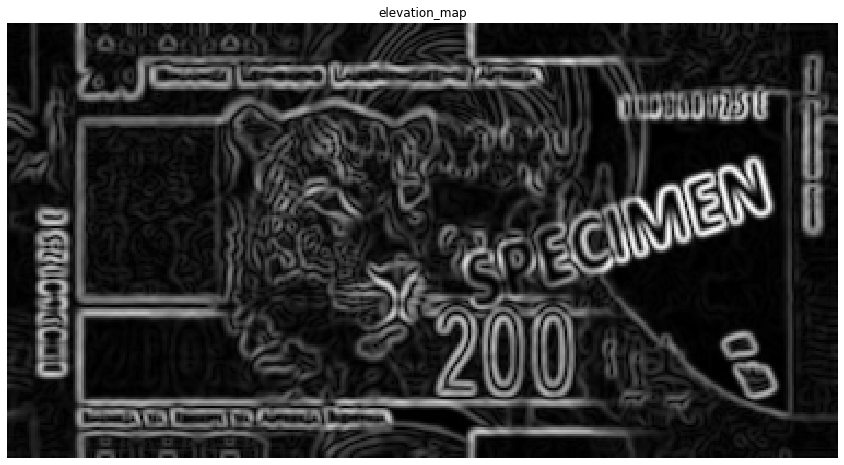

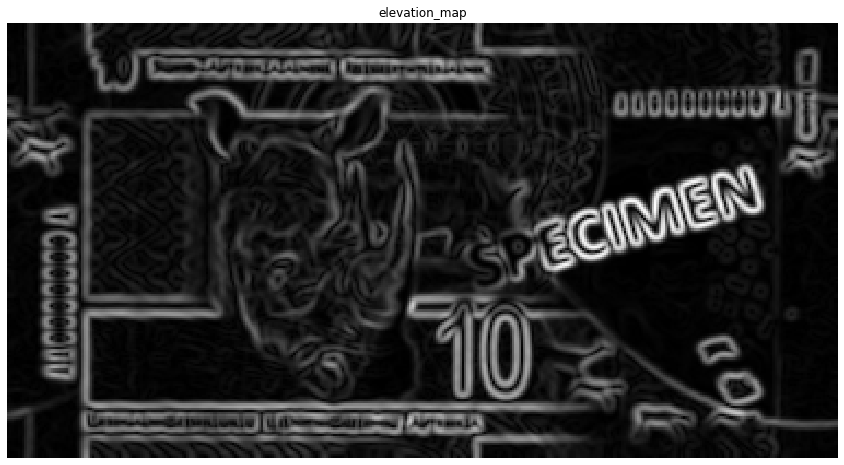

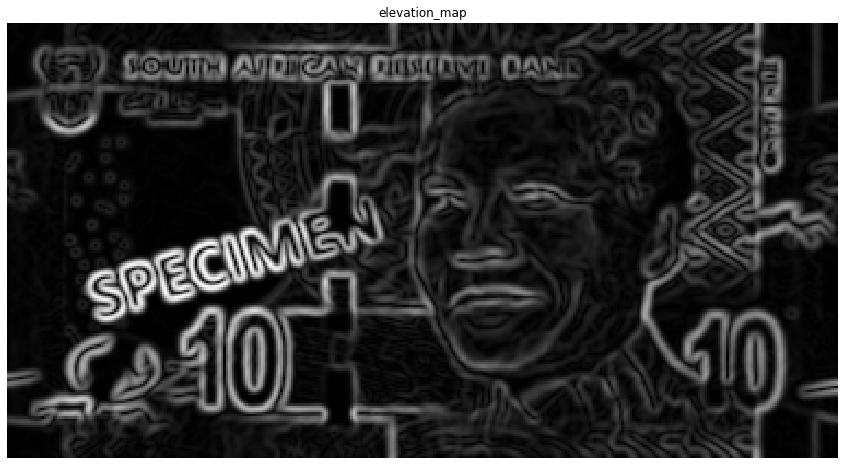

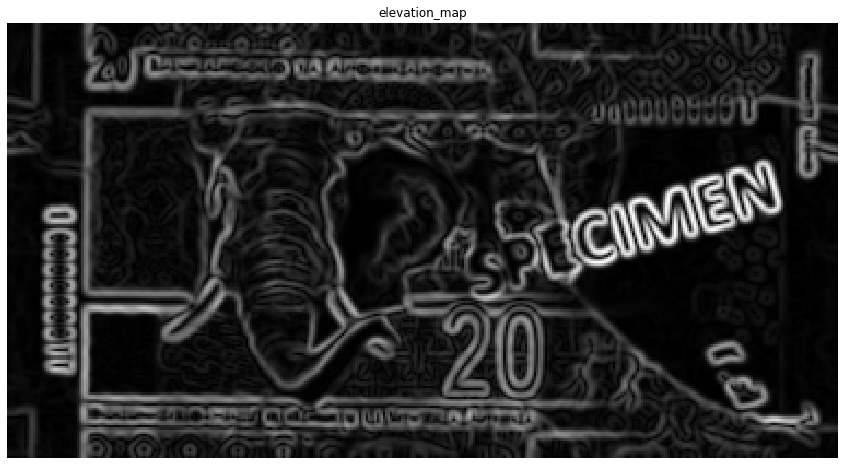

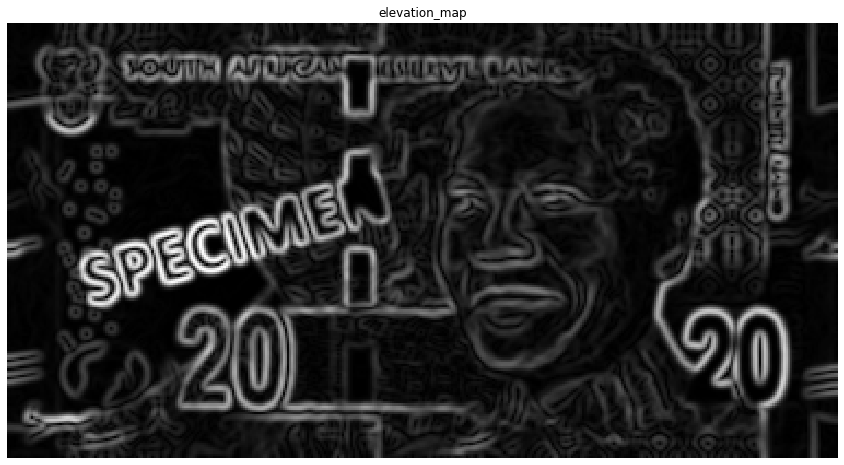

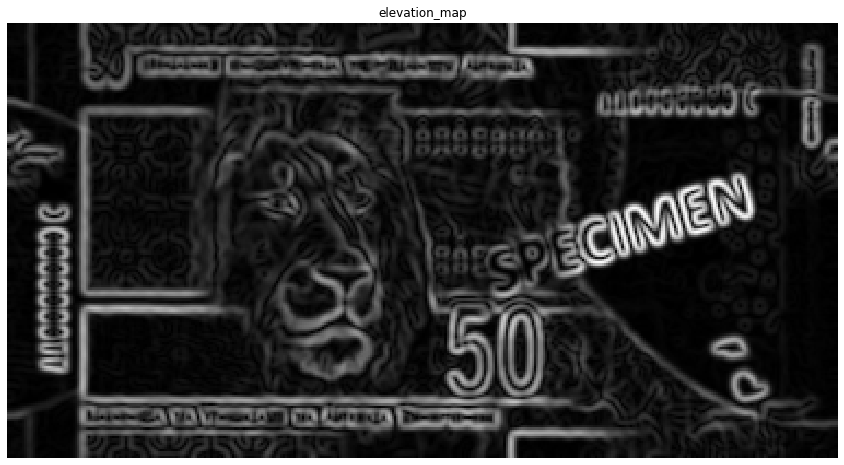

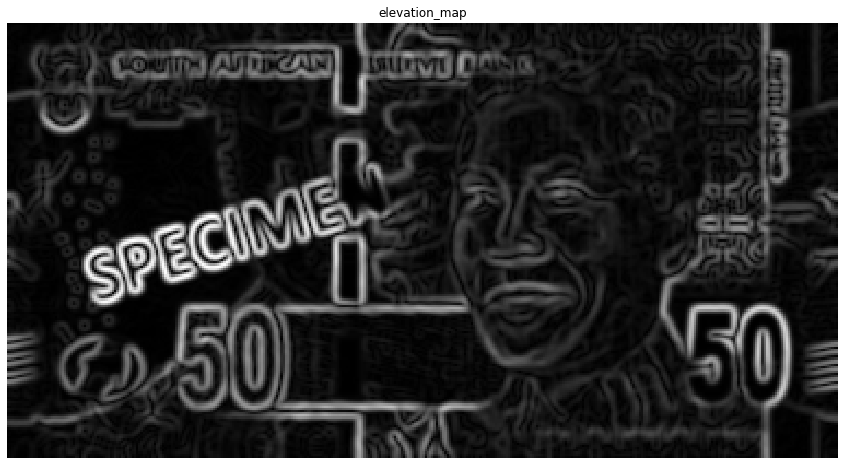

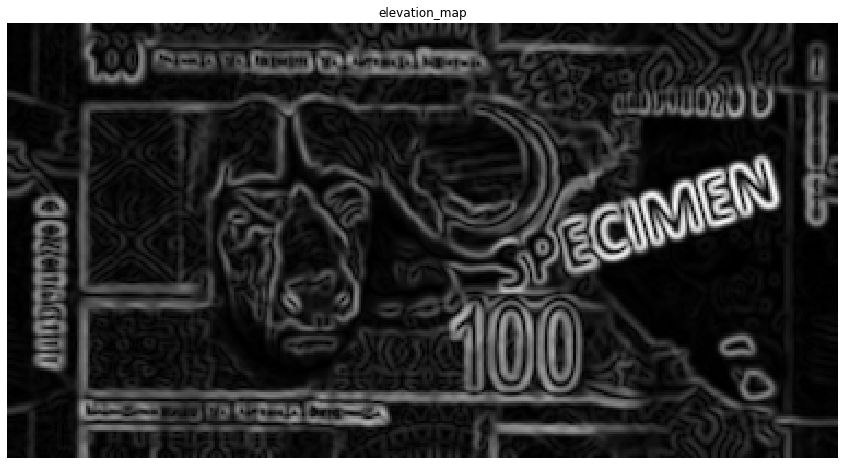

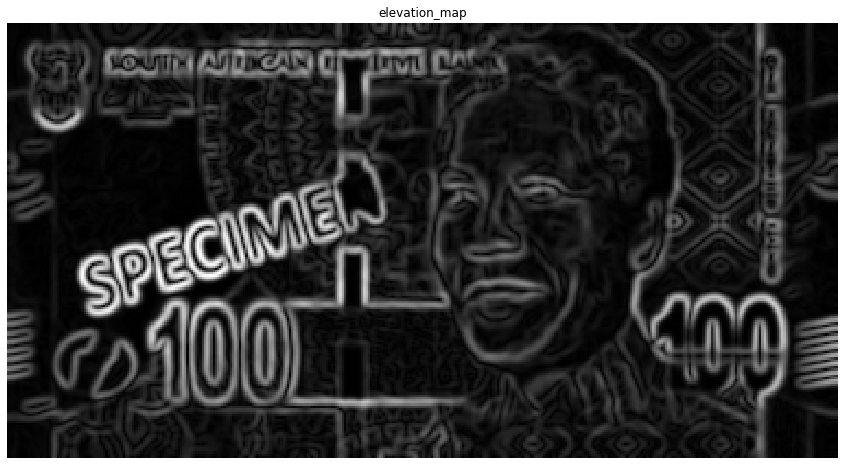

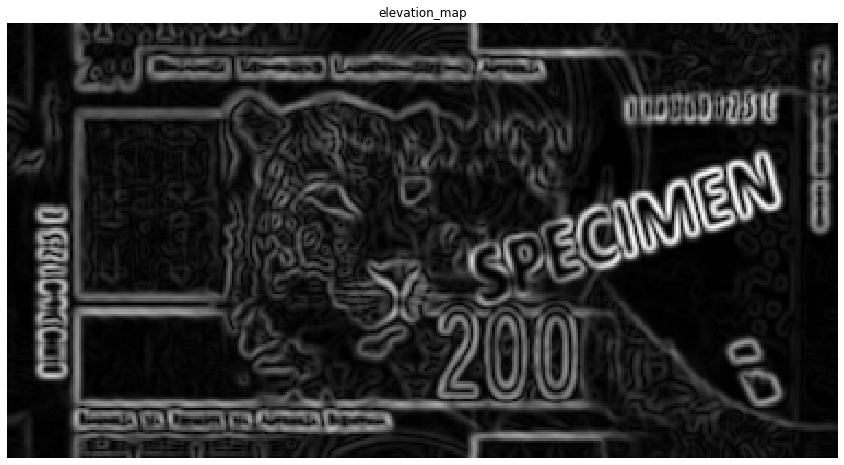

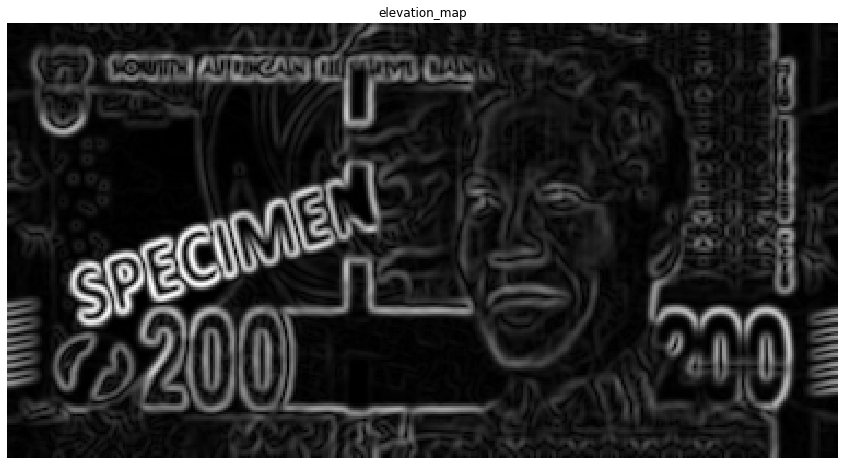

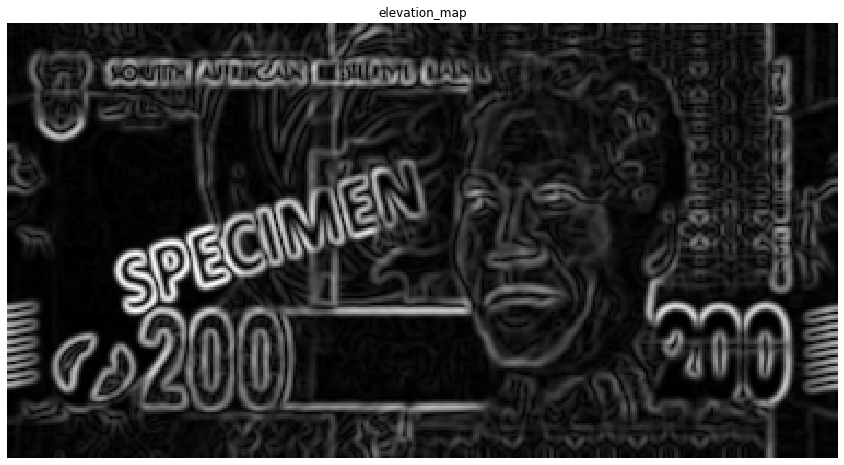

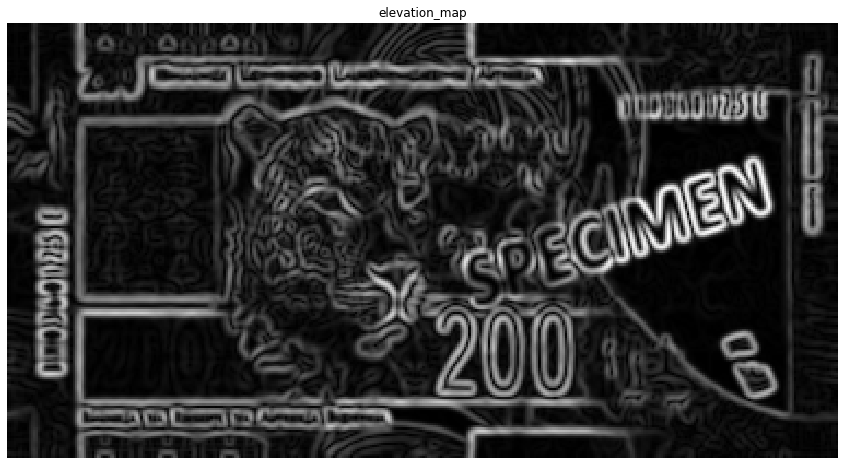

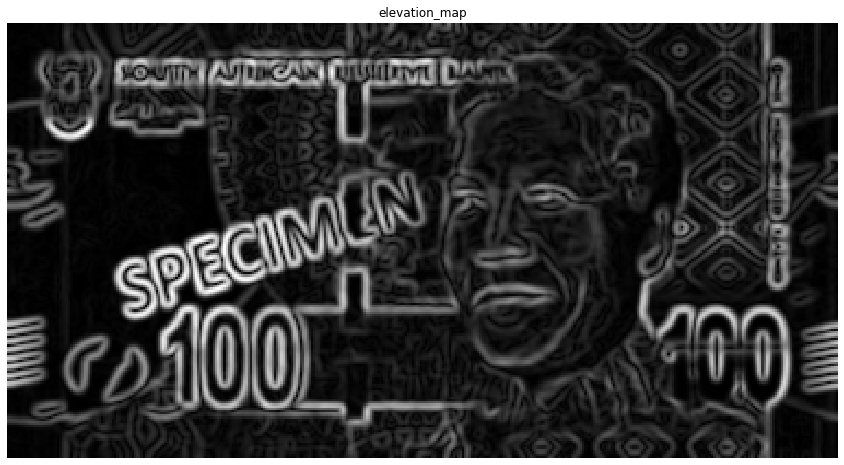

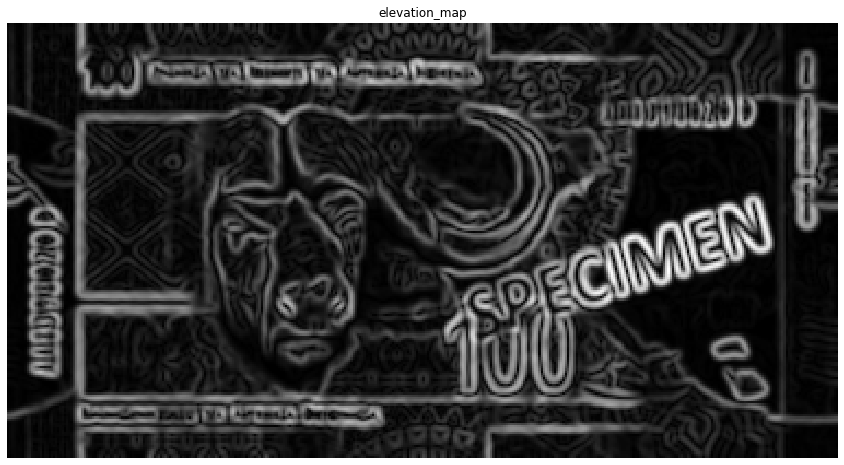

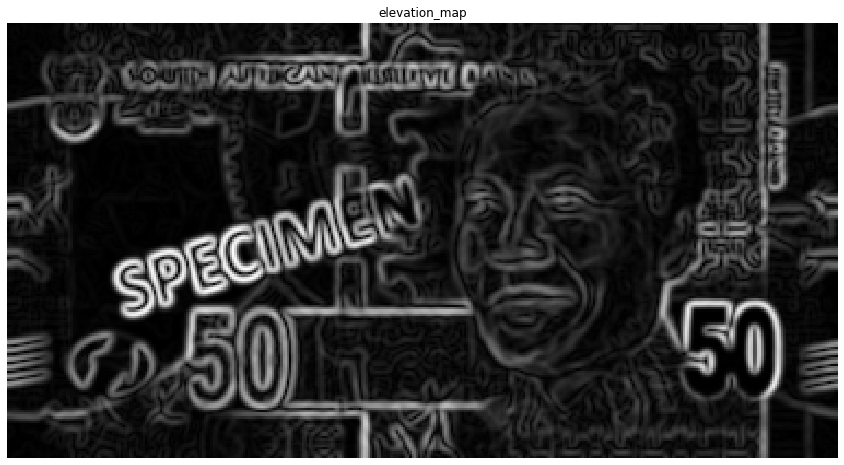

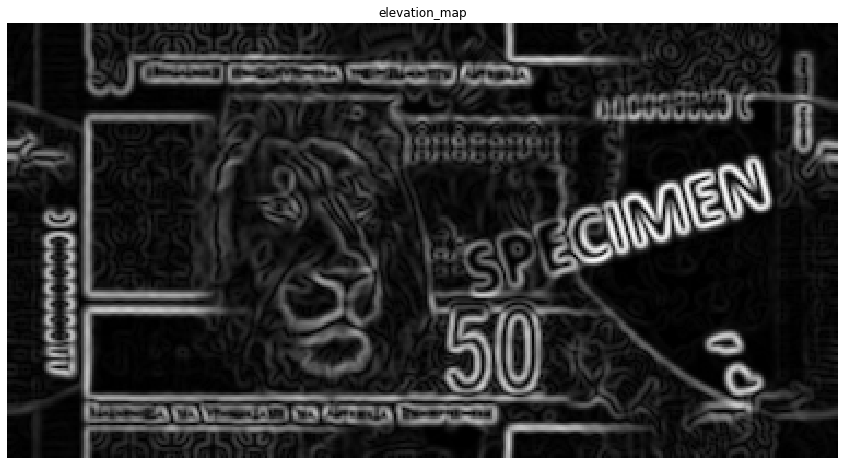

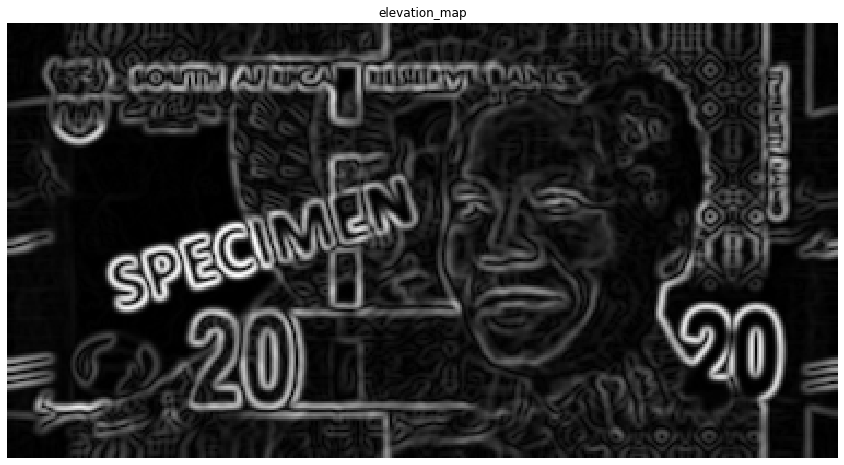

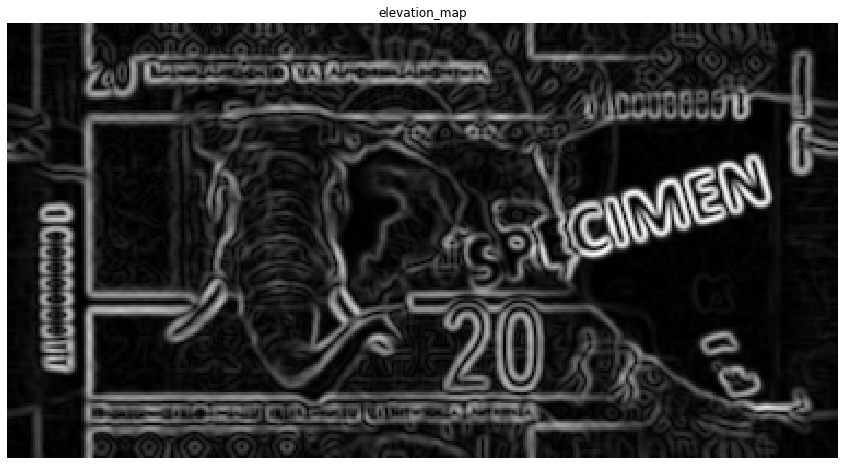

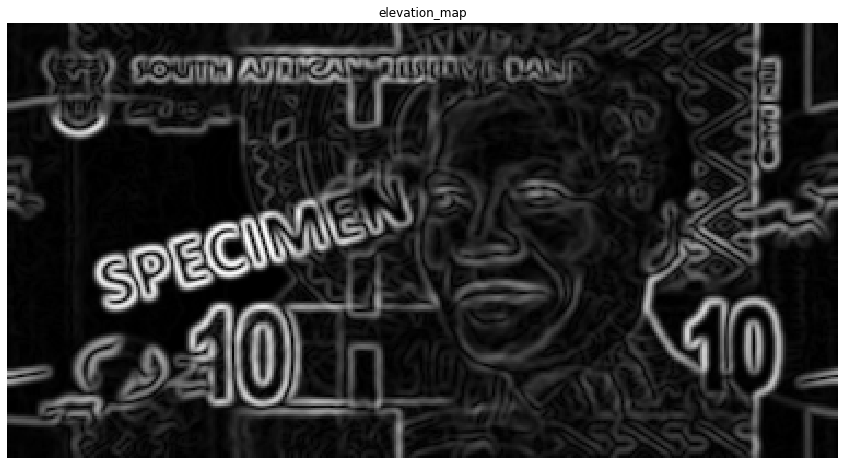

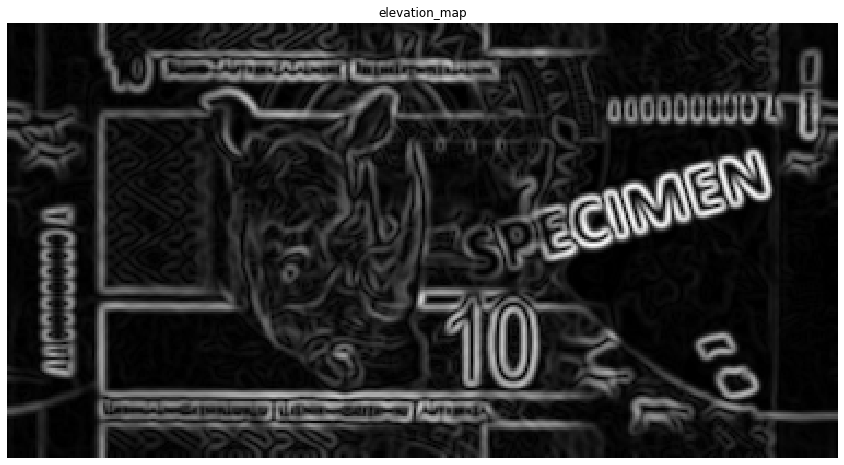

In [ ]:
#Uncomment the function you want to run for both methods
for i in range(len(preProcessedPNG)):
    #print(preProcessedJPG[i][0])
    image = preProcessedPNG[i][1]
    filename= preProcessedPNG[i][0]
    gaussian_blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    histogram_equalized_image = cv2.equalizeHist(gaussian_blurred_image)
    #EdgeSementation(filename,histogram_equalized_image,1)
    #GlobalThresholding(filename,histogram_equalized_image,1)
    #adaptiveThreshold(filename,histogram_equalized_image,1)
    RegionBased(filename,histogram_equalized_image,'1')

for i in range(len(preProcessedJPG)):
    #print(preProcessedJPG[i][0])
    image = preProcessedJPG[i][1]
    filename= preProcessedJPG[i][0]
    gaussian_blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    histogram_equalized_image = cv2.equalizeHist(gaussian_blurred_image)
    #EdgeSementation(filename,histogram_equalized_image,2)
    #GlobalThresholding(filename,histogram_equalized_image,2)
    #adaptiveThreshold(filename,histogram_equalized_image,2)
    RegionBased(filename,histogram_equalized_image,'2')



Bank Note Features Extraction

In [ ]:
#Method Calculates and returns the feature vector og an image as a list of 28 values
def getFeatureVectorOfImage(img):
  featureVector=[]
  #cv2_imshow(img)   
  graycomatrices = feature.greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256) #P0,1 #P45,1 #P90,1 #P135,1

  #Entropy
  glcm = np.squeeze(greycomatrix(img, distances=[1], angles=[0], symmetric=True, normed=True))
  entropy0 = -np.sum(glcm*np.log2(glcm + (glcm==0)))
  featureVector.append(entropy0) # for GLCM P0,1
  glcm = np.squeeze(greycomatrix(img, distances=[1], angles=[np.pi/4], symmetric=True, normed=True))
  entropy45 = -np.sum(glcm*np.log2(glcm + (glcm==0)))
  featureVector.append(entropy45)# for GLCM P45,1
  glcm = np.squeeze(greycomatrix(img, distances=[1], angles=[np.pi/2], symmetric=True, normed=True))
  entropy90 = -np.sum(glcm*np.log2(glcm + (glcm==0)))
  featureVector.append(entropy90)# for GLCM P90,1
  glcm = np.squeeze(greycomatrix(img, distances=[1], angles=[3*np.pi/4], symmetric=True, normed=True))
  entropy135 = -np.sum(glcm*np.log2(glcm + (glcm==0)))
  featureVector.append(entropy135)# for GLCM P135,1
  #Contrast
  contrast = feature.greycoprops(graycomatrices, 'contrast')
  featureVector.append(contrast[0,0]) # for GLCM P45,1
  featureVector.append(contrast[0,1])# for GLCM P45,1
  featureVector.append(contrast[0,2])# for GLCM P90,1
  featureVector.append(contrast[0,3])# for GLCM P135,1
  #Dissimilarity
  dissimilarity = feature.greycoprops( graycomatrices, 'dissimilarity')
  featureVector.append(dissimilarity[0,0]) # for GLCM P0,1
  featureVector.append(dissimilarity[0,1])# for GLCM P45,1
  featureVector.append(dissimilarity[0,2])# for GLCM P90,1
  featureVector.append(dissimilarity[0,3])
  #Homogeneity
  homogeneity = feature.greycoprops( graycomatrices, 'homogeneity')
  featureVector.append(homogeneity[0,0]) # for GLCM P0,1
  featureVector.append(homogeneity[0,1])# for GLCM P45,1
  featureVector.append(homogeneity[0,2])# for GLCM P90,1
  featureVector.append(homogeneity[0,3])# for GLCM P135,1
  #ASM 
  ASM = feature.greycoprops(graycomatrices, 'ASM')
  featureVector.append(ASM[0,0]) # for GLCM P0,1
  featureVector.append(ASM[0,1])# for GLCM P45,1
  featureVector.append(ASM[0,2])# for GLCM P90,1
  featureVector.append(ASM[0,3])# for GLCM P135,1
  #Energy
  energy = feature.greycoprops( graycomatrices, 'energy')
  featureVector.append(energy[0,0]) # for GLCM P0,1
  featureVector.append(energy[0,1])# for GLCM P45,1
  featureVector.append(energy[0,2])# for GLCM P90,1
  featureVector.append(energy[0,3])# for GLCM P135,1
  #Correlation
  correlation = feature.greycoprops(graycomatrices, 'correlation')
  featureVector.append(correlation[0,0]) # for GLCM P0,1
  featureVector.append(correlation[0,1])# for GLCM P45,1
  featureVector.append(correlation[0,2])# for GLCM P90,1
  featureVector.append(correlation[0,3])# for GLCM P135,1
  
  return featureVector
#Feature Vector is a list  of size = [EntropyP0,1 ;EntropyP45,1;EntropyP90,1;EntropyP135,1 ;ContrastP0,1----;DissimilarityP0,1----;HomogeneityP0,1------;ASMP0,1-----,EnergyP0,1----;CorrelationP0,1-----; CorrelationP135,1 ]

In [ ]:
featureVectorsForPNGS=[] #List will store the 1.File Names and the resepective 2.JPSGs(Have been preprocessed and segmented) and its 3.feature vector(this is a list) 
featureVectorsForJPGS=[] #List will store the 1.File Names and the resepective 2.PNGs(Have been preprocessed and segmented) and its 3.feature vector(this is a list)  

for i in range(len(rbsPNG)):
   featureVectorsForPNGS.append([rbsPNG[i][0],rbsPNG[i][1],getFeatureVectorOfImage(rbsPNG[i][1])])

for i in range(len(rbsJPG)):
  featureVectorsForJPGS.append([rbsJPG[i][0],rbsJPG[i][1],getFeatureVectorOfImage(rbsJPG[i][1])])

#for i in range(len(featureVectorsForPNGS)):
   #print(featureVectorsForPNGS[i])
#for i in range(len(featureVectorsForJPGS)):
   #print(featureVectorsForJPGS[i])
     

Bank Note Classification

In [ ]:
#A look at the names of notes stored in feature vectors
print(featureVectorsForPNGS[0][0])
print(featureVectorsForPNGS[1][0])

/content/drive/MyDrive/702Proj/RandNotes/010obverse-th.png
/content/drive/MyDrive/702Proj/RandNotes/010reverse-th.png


In [ ]:
#Concatenating the PNGs and JPGS into a single list
featureVectorsForBoth= featureVectorsForPNGS+featureVectorsForJPGS

In [ ]:
print(len(featureVectorsForBoth))

50


In [ ]:
#Method for extracting and storing the feature vectors and labels into X and Y 
def extractXY(data):
  X=[]
  Y=[]
  for note in data:
    X.append(note[2])

    if "010" in note[0]:
      Y.append("10")
    elif "020" in note[0]:
      Y.append("20")
    elif "10b" in note[0] or "10r" in note[0] or "10f" in note[0] or "10n" in note[0]:
      Y.append("10")
    elif "20b" in note[0] or "20r" in note[0] or "20f" in note[0] or "20n" in note[0]:
      Y.append("20")
    elif "50" in note[0]:
      Y.append("50")
    elif "100" in note[0]:
      Y.append("100")
    elif "200" in note[0]:
      Y.append("200")
    
  return X,Y


In [ ]:
#Converting X and Y to numpy arrays
X, Y= extractXY(featureVectorsForBoth)
print(len(X))
Y= [int(x) for x in Y]

Xarr=np.array(X)
Yarr=np.array(Y)


50


Splitting data 80/20

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Xarr, Yarr, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((40, 28), (40,))

#Random Forest Classifier

In [ ]:
clf = RandomForestClassifier()

In [ ]:
#fitting models using default parameters
clf.fit(X_train, Y_train)

Prediction on single Sample

In [ ]:
X[0]

In [ ]:
#Predicts the Note value of this sample fature vector
print(clf.predict([[12.448464840465316,
 12.978253109985802,
 12.38627201878771,
 12.936871968543414,
 128.93707322894164,
 247.29797979797988,
 116.39844497607649,
 235.28254843954062,
 6.457896341867652,
 9.506263159297461,
 6.260034556087188,
 9.213333866368162,
 0.27430306012922845,
 0.21578965511843873,
 0.30683325409556117,
 0.220490382485413,
 0.00042611173677376007,
 0.00031774500372876835,
 0.00048361811404286,
 0.0003248549050762609,
 0.02064247409526678,
 0.01782540332583721,
 0.021991319061003593,
 0.018023731718938254,
 0.9881151320023136,
 0.9772141428423344,
 0.9892757663099178,
 0.9783214798588604]]))

[10]


Prediction Probability

In [ ]:
print(Y)

In [ ]:
#probability of predicting the fature vector into each of the labels
print(clf.predict_proba([[12.448464840465316,
 12.978253109985802,
 12.38627201878771,
 12.936871968543414,
 128.93707322894164,
 247.29797979797988,
 116.39844497607649,
 235.28254843954062,
 6.457896341867652,
 9.506263159297461,
 6.260034556087188,
 9.213333866368162,
 0.27430306012922845,
 0.21578965511843873,
 0.30683325409556117,
 0.220490382485413,
 0.00042611173677376007,
 0.00031774500372876835,
 0.00048361811404286,
 0.0003248549050762609,
 0.02064247409526678,
 0.01782540332583721,
 0.021991319061003593,
 0.018023731718938254,
 0.9881151320023136,
 0.9772141428423344,
 0.9892757663099178,
 0.9783214798588604]]))

[[0.84 0.04 0.05 0.03 0.04]]


Predicted class labels

In [ ]:
#predicts the class labels for each vector in the test split
print(clf.predict(X_test))

[100 200  50  20  10 100  10  20 100 200]


Actual class labels

In [ ]:
#These are the actual labels of the test split
print(Y_test)

[100 200  10  20  10  50  10 200 200 100]


Model Performance

In [ ]:
#Accuracy of the model
print(clf.score(X_test, Y_test))

0.5


#KNeighbors Classifier


In [ ]:
clf = KNeighborsClassifier()

In [ ]:
clf.fit(X_train, Y_train)

KNeighborsClassifier()

Prediction on single Sample

In [ ]:
X[0]

[12.448464840465316,
 12.978253109985802,
 12.38627201878771,
 12.936871968543414,
 128.93707322894164,
 247.29797979797988,
 116.39844497607649,
 235.28254843954062,
 6.457896341867652,
 9.506263159297461,
 6.260034556087188,
 9.213333866368162,
 0.27430306012922845,
 0.21578965511843873,
 0.30683325409556117,
 0.220490382485413,
 0.00042611173677376007,
 0.00031774500372876835,
 0.00048361811404286,
 0.0003248549050762609,
 0.02064247409526678,
 0.01782540332583721,
 0.021991319061003593,
 0.018023731718938254,
 0.9881151320023136,
 0.9772141428423344,
 0.9892757663099178,
 0.9783214798588604]

In [ ]:
print(clf.predict([[12.448464840465316,
 12.978253109985802,
 12.38627201878771,
 12.936871968543414,
 128.93707322894164,
 247.29797979797988,
 116.39844497607649,
 235.28254843954062,
 6.457896341867652,
 9.506263159297461,
 6.260034556087188,
 9.213333866368162,
 0.27430306012922845,
 0.21578965511843873,
 0.30683325409556117,
 0.220490382485413,
 0.00042611173677376007,
 0.00031774500372876835,
 0.00048361811404286,
 0.0003248549050762609,
 0.02064247409526678,
 0.01782540332583721,
 0.021991319061003593,
 0.018023731718938254,
 0.9881151320023136,
 0.9772141428423344,
 0.9892757663099178,
 0.9783214798588604]]))

[10]


Prediction Probability

In [ ]:
print(clf.predict_proba([[12.448464840465316,
 12.978253109985802,
 12.38627201878771,
 12.936871968543414,
 128.93707322894164,
 247.29797979797988,
 116.39844497607649,
 235.28254843954062,
 6.457896341867652,
 9.506263159297461,
 6.260034556087188,
 9.213333866368162,
 0.27430306012922845,
 0.21578965511843873,
 0.30683325409556117,
 0.220490382485413,
 0.00042611173677376007,
 0.00031774500372876835,
 0.00048361811404286,
 0.0003248549050762609,
 0.02064247409526678,
 0.01782540332583721,
 0.021991319061003593,
 0.018023731718938254,
 0.9881151320023136,
 0.9772141428423344,
 0.9892757663099178,
 0.9783214798588604]]))

[[0.4 0.  0.4 0.  0.2]]


Predicted class labels

In [ ]:
print(clf.predict(X_test))

[ 20  20 100 200  20 200  20  10  10  20]


Actual class labels

In [ ]:
print(Y_test)

[100 200  10  20  10  50  10 200 200 100]


Model Performance

In [ ]:
print(clf.score(X_test, Y_test))

0.0


# Gaussian Naive Bayes Classifier

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(X_train, Y_train)

GaussianNB()

Prediction on single Sample

In [ ]:
X[0]

[12.448464840465316,
 12.978253109985802,
 12.38627201878771,
 12.936871968543414,
 128.93707322894164,
 247.29797979797988,
 116.39844497607649,
 235.28254843954062,
 6.457896341867652,
 9.506263159297461,
 6.260034556087188,
 9.213333866368162,
 0.27430306012922845,
 0.21578965511843873,
 0.30683325409556117,
 0.220490382485413,
 0.00042611173677376007,
 0.00031774500372876835,
 0.00048361811404286,
 0.0003248549050762609,
 0.02064247409526678,
 0.01782540332583721,
 0.021991319061003593,
 0.018023731718938254,
 0.9881151320023136,
 0.9772141428423344,
 0.9892757663099178,
 0.9783214798588604]

In [ ]:
print(clf.predict([[12.448464840465316,
 12.978253109985802,
 12.38627201878771,
 12.936871968543414,
 128.93707322894164,
 247.29797979797988,
 116.39844497607649,
 235.28254843954062,
 6.457896341867652,
 9.506263159297461,
 6.260034556087188,
 9.213333866368162,
 0.27430306012922845,
 0.21578965511843873,
 0.30683325409556117,
 0.220490382485413,
 0.00042611173677376007,
 0.00031774500372876835,
 0.00048361811404286,
 0.0003248549050762609,
 0.02064247409526678,
 0.01782540332583721,
 0.021991319061003593,
 0.018023731718938254,
 0.9881151320023136,
 0.9772141428423344,
 0.9892757663099178,
 0.9783214798588604]]))

[10]


Prediction Probability

In [ ]:
print(clf.predict_proba([[12.448464840465316,
 12.978253109985802,
 12.38627201878771,
 12.936871968543414,
 128.93707322894164,
 247.29797979797988,
 116.39844497607649,
 235.28254843954062,
 6.457896341867652,
 9.506263159297461,
 6.260034556087188,
 9.213333866368162,
 0.27430306012922845,
 0.21578965511843873,
 0.30683325409556117,
 0.220490382485413,
 0.00042611173677376007,
 0.00031774500372876835,
 0.00048361811404286,
 0.0003248549050762609,
 0.02064247409526678,
 0.01782540332583721,
 0.021991319061003593,
 0.018023731718938254,
 0.9881151320023136,
 0.9772141428423344,
 0.9892757663099178,
 0.9783214798588604]]))

[[9.99812923e-01 1.07652950e-07 1.86969662e-04 1.25872170e-12
  1.51075282e-10]]


Predicted class labels

In [ ]:
print(clf.predict(X_test))

[200 200 100 200  10 200  10  50 200 200]


Actual class labels

In [ ]:
print(Y_test)

[100 200  10  20  10  50  10 200 200 100]


Model Performance

In [ ]:
print(clf.score(X_test, Y_test))

0.4
